**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
for (x in dir(fdiry)) {print(x)}

[1] "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.perbase.tsv"
[1] "KS91_K562_hg38_ASTARRseq_Depth.MYC.unstranded.perbase.tsv"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep1.MYC.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep2.MYC.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep3.MYC.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep4.MYC.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep5.MYC.unstranded.dedups.perbase.tsv.gz"
[1] "KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.perba

## Import library sizes

In [3]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

dat_lib = read_tsv(fpath, show_col_types = FALSE)
head(dat_lib)

Sample,Group,Replicate,Region,Size
<chr>,<chr>,<chr>,<chr>,<dbl>
Input_rep1,Input,rep1,GATA1,358823
Input_rep1,Input,rep1,MYC,255600
Input_rep2,Input,rep2,GATA1,461577
Input_rep2,Input,rep2,MYC,331419
Input_rep3,Input,rep3,GATA1,496229
Input_rep3,Input,rep3,MYC,359228


## Test

In [4]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init: column names and types
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### init: regions
REGIONS = c("GATA1", "MYC")

### get one example
REGION = REGIONS[1]

### INPUT: set sample group and number of replicates
GROUP   = "Input"
REPLS   = paste0("rep", 1:6)

### INPUT: import data
cat("\n", "Import: Input (Deduplicated)", "\n")
lst_dat_inp = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))

    ### read data
    print(fpath); flush.console()
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

### OUTPUT: set sample group and number of replicates
GROUP  = "Output"
REPLS  = paste0("rep", 1:4)

### OUTPUT: import data
cat("\n", "Import: Output", "\n")
lst_dat_out = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))

    ### read data
    print(fpath); flush.console()
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})


 Import: Input (Deduplicated) 
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.perbase.tsv.gz"

 Import: Output 
[1] "/mount/work/out/proj_combef

In [5]:
### normalize and arrange columns
cat("\n", "Normalize and arrange", "\n"); flush.console()
dat_depth = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by=c("Sample", "Region")) %>%
    mutate(
        Depth_Norm_add00 =  Depth       / Size, 
        Depth_Norm_add01 = (Depth +  1) / Size,
        Depth_Norm_add10 = (Depth + 10) / Size)
head(dat_depth)


 Normalize and arrange 


Chrom,Loc,Depth,Sample,Region,Group,Replicate,Size,Depth_Norm_add00,Depth_Norm_add01,Depth_Norm_add10
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,0,Input_rep1,GATA1,Input,rep1,358823,0,2.786889e-06,2.786889e-05
chrX,47786401,0,Input_rep1,GATA1,Input,rep1,358823,0,2.786889e-06,2.786889e-05
chrX,47786402,0,Input_rep1,GATA1,Input,rep1,358823,0,2.786889e-06,2.786889e-05
chrX,47786403,0,Input_rep1,GATA1,Input,rep1,358823,0,2.786889e-06,2.786889e-05
chrX,47786404,0,Input_rep1,GATA1,Input,rep1,358823,0,2.786889e-06,2.786889e-05
chrX,47786405,0,Input_rep1,GATA1,Input,rep1,358823,0,2.786889e-06,2.786889e-05


In [25]:
tmp_add00 = dat_depth %>% 
    dplyr::select(
        Chrom,  Loc, 
        Sample, Group, Replicate, Region, 
        Depth,  Size,  Depth_Norm_add00) %>% 
    dplyr::rename(Value = Depth_Norm_add00) %>% 
    group_by(Chrom, Loc, Group) %>% 
    summarize(Value = mean(Value), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(FC = Output / Input)
head(tmp_add00)

Chrom,Loc,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,0,0,NaN
chrX,47786401,0,0,NaN
chrX,47786402,0,0,NaN
chrX,47786403,0,0,NaN
chrX,47786404,0,0,NaN
chrX,47786405,0,0,NaN


In [13]:
tmp_add01 = dat_depth %>% 
    dplyr::select(
        Chrom,  Loc, 
        Sample, Group, Replicate, Region, 
        Depth,  Size,  Depth_Norm_add01) %>% 
    dplyr::rename(Value = Depth_Norm_add01) %>% 
    group_by(Chrom, Loc, Group) %>% 
    summarize(Value = mean(Value), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(FC = Output / Input)
head(tmp_add01)

Chrom,Loc,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,2.294508e-06,1.763146e-06,0.76842
chrX,47786401,2.294508e-06,1.763146e-06,0.76842
chrX,47786402,2.294508e-06,1.763146e-06,0.76842
chrX,47786403,2.294508e-06,1.763146e-06,0.76842
chrX,47786404,2.294508e-06,1.763146e-06,0.76842
chrX,47786405,2.294508e-06,1.763146e-06,0.76842


In [14]:
tmp_add10 = dat_depth %>% 
    dplyr::select(
        Chrom,  Loc, 
        Sample, Group, Replicate, Region, 
        Depth,  Size,  Depth_Norm_add10) %>% 
    dplyr::rename(Value = Depth_Norm_add10) %>% 
    group_by(Chrom, Loc, Group) %>% 
    summarize(Value = mean(Value), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(FC = Output / Input)
head(tmp_add10)

Chrom,Loc,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,2.294508e-05,1.763146e-05,0.76842
chrX,47786401,2.294508e-05,1.763146e-05,0.76842
chrX,47786402,2.294508e-05,1.763146e-05,0.76842
chrX,47786403,2.294508e-05,1.763146e-05,0.76842
chrX,47786404,2.294508e-05,1.763146e-05,0.76842
chrX,47786405,2.294508e-05,1.763146e-05,0.76842


In [ ]:
dat = tmp_add00
dat$log2FC = log2(dat$FC)
dat = dat %>% dplyr::filter(Loc>=48780000, Loc<=48826000)

gp1 = ggplot(dat, aes(x=Loc, y=FC)) +
    geom_hline(yintercept=0, color="grey10") +
    geom_line(size=1) + 
    theme_cowplot() +
    labs(
        title="FC = ((Count_Output / LibSize_Output) / (Count_Input / LibSize_Input)",
        y = "FC")

gp2 = ggplot(dat, aes(x=Loc, y=log2FC)) +
    geom_hline(yintercept=0, color="grey10") +
    geom_line(size=1) + 
    theme_cowplot() +
    labs(y = "log2(FC)")

In [22]:
dat = tmp_add01
dat$log2FC = log2(dat$FC)
dat = dat %>% dplyr::filter(Loc>=48780000, Loc<=48826000)

gp1 = ggplot(dat, aes(x=Loc, y=FC)) +
    geom_hline(yintercept=0, color="grey10") +
    geom_line(size=1) + 
    theme_cowplot() +
    labs(
        title="FC = ((Count_Output+1) / LibSize_Output) / (Count_Input+1) / LibSize_Input",
        y = "FC")

gp2 = ggplot(dat, aes(x=Loc, y=log2FC)) +
    geom_hline(yintercept=0, color="grey10") +
    geom_line(size=1) + 
    theme_cowplot() +
    labs(y = "log2(FC)")

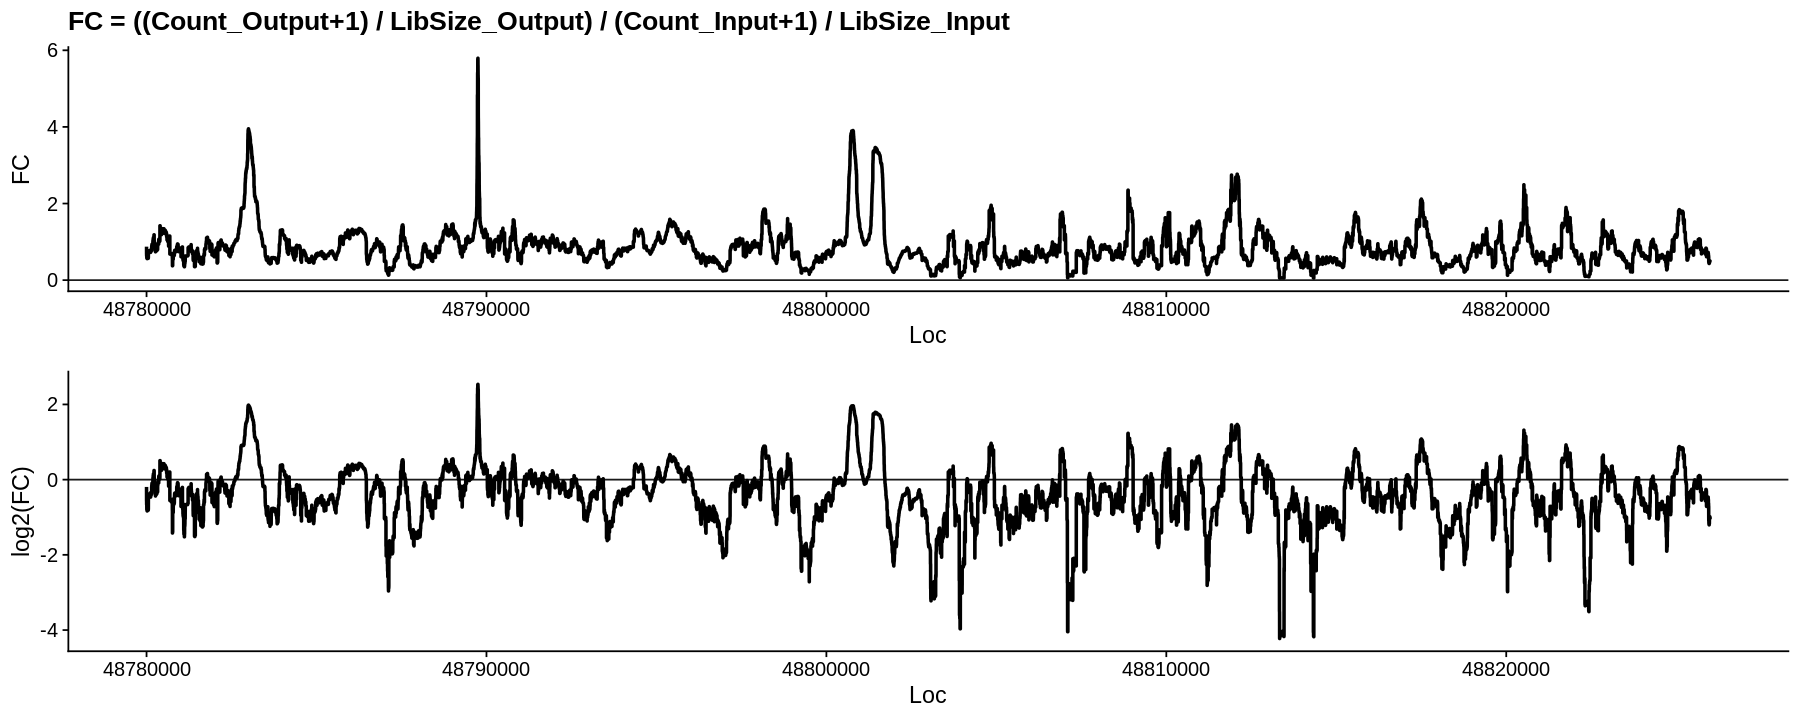

In [24]:
options(repr.plot.height=6, repr.plot.width=15)
plot_grid(gp1, gp2, align="v", ncol=1)

Warning message:
“Removed 1954349 row(s) containing missing values (geom_path).”


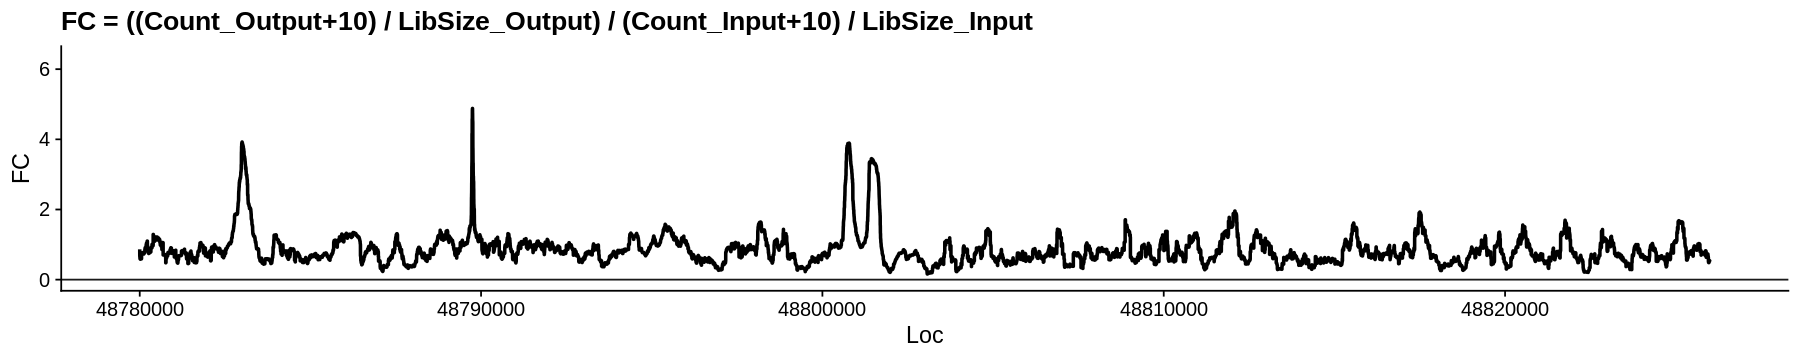

In [17]:
dat = tmp_add10
gpt = ggplot(dat, aes(x=Loc, y=FC)) +
    geom_hline(yintercept=0, color="grey10") +
    geom_line(size=1) + 
    theme_cowplot() +
    xlim(48780000, 48826000) +
    labs(title="FC = ((Count_Output+10) / LibSize_Output) / (Count_Input+10) / LibSize_Input")

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [ ]:
### summarize and calculate fold change
    dat_ratio = dat_depth %>% 
        group_by(Chrom, Loc, Group) %>% 
        summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
        spread(Group, Value) %>%
        mutate(
            FC_out00_inp01 =  Output     / (Input+1),
            FC_out01_inp01 = (Output+1)  / (Input+1),
            FC_out10_inp10 = (Output+10) / (Input+10))

## Import coverage per each base pair

In [4]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init: column names and types
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### init: regions
REGIONS = c("GATA1", "MYC")

for (REGION in REGIONS){
    cat("REGION:", REGION, "\n")
    
    ### INPUT: set sample group and number of replicates
    GROUP   = "Input"
    REPLS   = paste0("rep", 1:6)

    ### INPUT: import data
    cat("\n", "Import: Input (Deduplicated)", "\n")
    lst_dat_inp = lapply(REPLS, function(repl){
        ### get sample file path
        sam   = paste(GROUP, repl, sep="_")
        fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
        fpath = Sys.glob(file.path(fdiry, fglob))

        ### read data
        print(fpath); flush.console()
        dat = read_tsv(
            fpath, 
            col_types = ctypes, 
            col_names = cnames)
        dat$Sample = sam
        dat$Region = REGION
        return(dat)
    })
    
    ### OUTPUT: set sample group and number of replicates
    GROUP  = "Output"
    REPLS  = paste0("rep", 1:4)

    ### OUTPUT: import data
    cat("\n", "Import: Output", "\n")
    lst_dat_out = lapply(REPLS, function(repl){
        ### get sample file path
        sam   = paste(GROUP, repl, sep="_")
        fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
        fpath = Sys.glob(file.path(fdiry, fglob))

        ### read data
        print(fpath); flush.console()
        dat = read_tsv(
            fpath, 
            col_types = ctypes, 
            col_names = cnames)
        dat$Sample = sam
        dat$Region = REGION
        return(dat)
    })
    
    ### normalize and arrange columns
    cat("\n", "Normalize and arrange", "\n"); flush.console()
    dat_depth = bind_rows(lst_dat_inp, lst_dat_out) %>% 
        left_join(dat_lib, by=c("Sample", "Region")) %>%
        mutate(Depth_Norm = Depth / Size)
    
    dat_depth = dat_depth %>% dplyr::select(
        Chrom,  Loc, 
        Sample, Group, Replicate, Region, 
        Depth,  Size,  Depth_Norm)
    
    ### summarize and calculate fold change
    dat_ratio = dat_depth %>% 
        group_by(Chrom, Loc, Group) %>% 
        summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
        spread(Group, Value) %>%
        mutate(
            FC_out00_inp01 =  Output     / (Input+1),
            FC_out01_inp01 = (Output+1)  / (Input+1),
            FC_out10_inp10 = (Output+10) / (Input+10))

    ### store the table
    cat("\n", "Save table", "\n")
    
    fname = paste0("KS91_K562_hg38_ASTARRseq_Depth.", REGION, ".unstranded.perbase.tsv")
    fpath = file.path(fdiry, fname)
    cat(fpath, "\n"); flush.console()
    write_tsv(dat_depth, fpath)
    
    fname = paste0("KS91_K562_hg38_ASTARRseq_Ratio.", REGION, ".unstranded.perbase.tsv")
    fpath = file.path(fdiry, fname)
    cat(fpath, "\n"); flush.console()
    write_tsv(dat_ratio, fpath)
    
    cat("--------------------------------------\n\n")
}

REGION: GATA1 

 Import: Input (Deduplicated) 
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.perbase.tsv.gz"

 Import: Output 
[1] "/mount/work/

-----

In [ ]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init: column names and types
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### init: regions
regions = c("GATA1", "MYC")

for (region in regions){
    print(
}

### INPUT: set sample group and number of replicates

GROUP   = "Input"
REPLS   = paste0("rep", 1:6)

### INPUT: import data
cat("Input (Deduplicated)", "\n")
lst_dat_inp = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

In [6]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### INPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP  = "Input"
REPLS  = paste0("rep", 1:6)

### INPUT: import data
cat("Input (Deduplicated)", "\n")
lst_dat_inp = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

### OUTPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP  = "Output"
REPLS  = paste0("rep", 1:4)

### OUTPUT: import data
cat("\n", "Output", "\n")
lst_dat_out = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

Input (Deduplicated) 
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.perbase.tsv.gz"

 Output 
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS

In [9]:
### summarize
dat = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by=c("Sample", "Region")) %>%
    mutate(Depth_Norm = Depth / Size)

### assign
dat_astarr = dat
print(dim(dat))
head(dat)

[1] 20003500        9


Chrom,Loc,Depth,Sample,Region,Group,Replicate,Size,Depth_Norm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786400,0,Input_rep1,GATA1,Input,rep1,358823,0
chrX,47786401,0,Input_rep1,GATA1,Input,rep1,358823,0
chrX,47786402,0,Input_rep1,GATA1,Input,rep1,358823,0
chrX,47786403,0,Input_rep1,GATA1,Input,rep1,358823,0
chrX,47786404,0,Input_rep1,GATA1,Input,rep1,358823,0
chrX,47786405,0,Input_rep1,GATA1,Input,rep1,358823,0


In [16]:
dat %>% head %>% dplyr::select(Chrom, Loc, Sample, Group, Replicate, Region, Depth, Size, Depth_Norm)

Chrom,Loc,Sample,Group,Replicate,Region,Depth,Size,Depth_Norm
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786401,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786402,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786403,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786404,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786405,Input_rep1,Input,rep1,GATA1,0,358823,0


In [11]:
fname = paste0("KS91_K562_hg38_ASTARRseq_Depth.", REGION, ".unstranded.perbase.tsv")
fpath = file.path(fdiry, fname)
print(fpath)


[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.perbase.tsv"


In [4]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### INPUT: set sample group and number of replicates
GROUP   = "Input"
REPLICS = paste0("rep", 1:6)

### INPUT: import data
lst_dat_inp = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

### OUTPUT: set sample group and number of replicates
GROUP   = "Output"
REPLICS = paste0("rep", 1:4)

### OUTPUT: import data
lst_dat_out = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

In [3]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "library_size.tsv"
dat_lib = read_tsv(file.path(fdiry, fname))
head(dat_lib)

Rows: 10 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Sample, Group, Replicate
dbl (1): Size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample,Group,Replicate,Size
<chr>,<chr>,<chr>,<dbl>
Input_rep1,Input,rep1,358823
Input_rep2,Input,rep2,461577
Input_rep3,Input,rep3,496229
Input_rep4,Input,rep4,464845
Input_rep5,Input,rep5,454013
Input_rep6,Input,rep6,409058


In [5]:
dat_astarr = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by="Sample") %>%
    mutate(Depth_Norm = Depth / Size)
head(dat_astarr)

Chrom,Loc,Depth,Sample,Group,Replicate,Size,Depth_Norm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786400,0,Input_rep1,Input,rep1,358823,0
chrX,47786401,0,Input_rep1,Input,rep1,358823,0
chrX,47786402,0,Input_rep1,Input,rep1,358823,0
chrX,47786403,0,Input_rep1,Input,rep1,358823,0
chrX,47786404,0,Input_rep1,Input,rep1,358823,0
chrX,47786405,0,Input_rep1,Input,rep1,358823,0


In [14]:
### summarize the repeats for output and inptu
dat = dat_astarr
dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarise(Depth_Norm = sum(Depth_Norm))

### calculate the ratio
dat = dat %>% 
    spread(Group, Depth_Norm) %>% 
    mutate(Ratio = Output / (Input+1))

head(dat)

`summarise()` has grouped output by 'Loc'. You can override using the `.groups` argument.


Loc,Input,Output,Ratio
<dbl>,<dbl>,<dbl>,<dbl>
47786400,0,0,0
47786401,0,0,0
47786402,0,0,0
47786403,0,0,0
47786404,0,0,0
47786405,0,0,0


In [15]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat, fpath)